In [128]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
import time

def read_file(filename):
    with open(filename, 'r') as file:
        lines = list(map(float, file))
    file.close()
    return lines

T_0 = 1
T = 60

# read from file
lines = read_file('6_1.txt')
lines = lines[1:]
servers = len(lines) # number of servers

$$\forall s < t \; (N_t - N_s) ~{\perp\!\!\!\perp}~ N_s \Rightarrow E(N_t - N_s ~\rvert~ N_s) = E(N_t - N_s)$$

Исходя из этого и учитывая то, что $N_t - N_s \sim Pois(\lambda(t - s))$, выведем формулу для $E(N_t ~\rvert~ N_s)$:

$$E(N_t ~\rvert~ N_s) = E(N_t - N_s + N_s ~\rvert~ N_s) =$$

$$= E(N_t - N_s) + E(N_s ~\rvert~ N_s) = E(N_t - N_s) + N_s = \lambda(t - s) + N_s$$

Возьмем в качестве **априорного распределения** сопряженное распределение к экспоненциальному — $\Gamma(k_0, \theta_0)$. 

**Подберем его параметры.** Предположим, что $k_0 \geq 2$. Тогда в окрестности какой-то точки, не равной нулю, вероятность будет больше, 
чем в остальных, а нам это не нужно, так как о параметре ничего неизвестно. Поэтому возьмем $k_0 = 1$.
Параметр масштаба $\theta_0$ возьмем равным 5 (чтобы скорость убывания 
функции была небольшой).

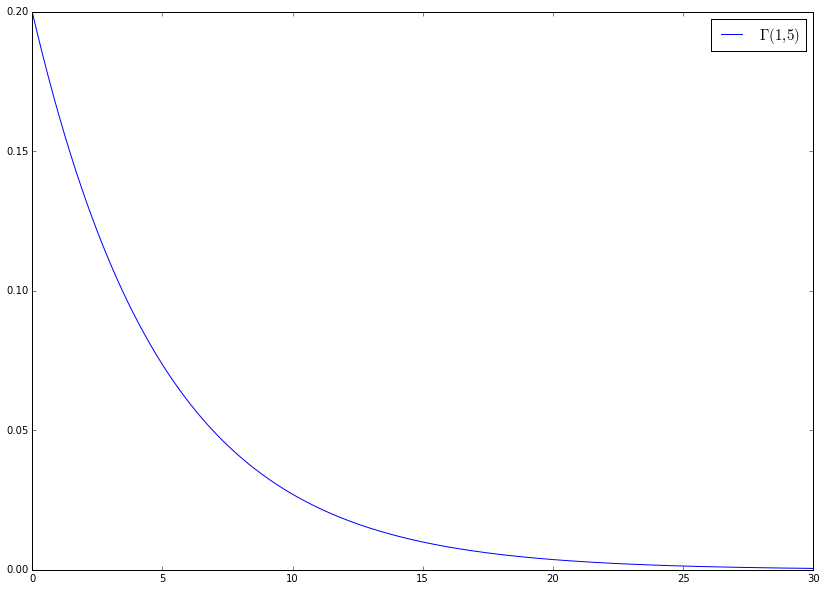

In [139]:
plt.figure(figsize=(14, 10))
x_axis = np.arange(0, 30, 0.0005)
plt.plot(x_axis, gamma.pdf(x_axis, a=1, scale=5), label='$\\Gamma(1, 5)$')
plt.legend(fontsize=15)
plt.show()

**Байесовская оценка** равна:

$$\widehat{\lambda} = \frac{k_0 + n}{\theta_0 + \sum{X_i}}$$

Во входном файле хранятся моменты времени, в которые вышел из строя очередной сервер. 
Сначала объединим события выхода из строя серверов и измерения количества вышедших из строя серверов в целочисленные
моменты времени.

In [142]:
SECONDS = 60
events = [(broken, 0) for broken in lines] + [(time, 1) 
                                              for time in range (SECONDS + 1)]
events.sort()

sample = []
start_time = time.time()
for event in events:
    if event[1] == 0:
        print(event[0], "\t", "break")
        sample.append(event[0] - np.sum(sample))
    else:
        lamb = (1 + len(sample)) / (5 + np.sum(sample))
        print(event[0], "\t", "%.3f" % (lamb * (T - event[0]) + len(sample)))
    time.sleep((start_time + (event[0] + 1) * T_0 - time.time()))

0 	 12.000
1 	 11.800
2 	 11.600
3 	 11.400
4 	 11.200
5 	 11.000
5.931 	 break
6 	 10.880
7 	 10.697
8 	 10.514
9 	 10.331
10 	 10.148
11 	 9.965
12 	 9.782
12.152 	 break
13 	 10.221
13.935 	 break
14 	 12.717
14.31 	 break
15 	 15.652
16 	 15.393
16.22 	 break
17 	 17.158
17.207 	 break
18 	 19.239
18.87 	 break
19 	 20.741
20 	 20.406
21 	 20.071
22 	 19.736
23 	 19.401
24 	 19.065
25 	 18.730
25.318 	 break
26 	 18.093
27 	 17.796
28 	 17.499
29 	 17.202
29.005 	 break
29.947 	 break
30 	 19.443
30.537 	 break
31 	 20.793
32 	 20.455
32.412 	 break
33 	 21.382
34 	 21.035
35 	 20.687
35.188 	 break
35.784 	 break
36 	 22.827
36.156 	 break
37 	 23.942
37.552 	 break
38 	 24.789
38.382 	 break
38.531 	 break
39 	 27.166
39.952 	 break
40 	 27.898
40.02 	 break
40.899 	 break
41 	 30.107
42 	 29.628
43 	 29.148
43.623 	 break
44 	 29.568
44.231 	 break
45 	 30.312
46 	 29.825
46.747 	 break
47 	 30.281
48 	 29.797
48.603 	 break
49 	 30.336
50 	 29.850
51 	 29.365
52 	 28.880
52.465